In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('CO_df.csv')

In [3]:
df.head()

,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,oat_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
0,30.7,0.4,79,1,32,13.0,-0.4,32,-2,30,...,22.3,0.0,61,1,34,0.0,0.0,0,0,38
1,31.5,0.8,82,3,34,12.4,-0.6,29,-3,38,...,22.1,-0.2,57,-4,41,0.0,0.0,0,0,47
2,32.3,0.8,87,5,27,12.1,-0.3,29,0,31,...,22.8,0.7,61,4,31,0.0,0.0,0,0,40
3,32.9,0.6,87,0,23,12.1,0.0,29,0,30,...,23.4,0.6,62,1,25,0.0,0.0,0,0,41
4,33.4,0.5,86,-1,32,11.6,-0.5,27,-2,42,...,23.3,-0.1,57,-5,38,0.0,0.0,0,0,45


In [110]:
translate = {
    'swe': 'Snow Water Equivalent (in)',
    'cswe': 'Change In Snow Water Equivalent (in)',
    'sd': 'Snow Depth (in)',
    'csd': 'Change In Snow Depth (in)',
    'oat': 'Observed Air Temperature (degrees farenheit)'
}

df.describe()

,swe_23,cswe_23,sd_23,csd_23,oat_23,swe_33,cswe_33,sd_33,csd_33,oat_33,...,swe_854,cswe_854,sd_854,csd_854,oat_854,swe_866,cswe_866,sd_866,csd_866,oat_866
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,...,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000
mean,6.850274,-0.003425,22.526575,-0.008493,28.842192,4.318274,-0.001205,14.973151,-0.002740,30.140274,...,4.969425,-0.003151,17.544658,-0.008219,33.583562,1.477014,0.000192,4.761644,0.000274,37.830685
std,8.004323,0.353017,23.256167,2.115742,12.985926,5.676682,0.270886,18.718721,1.771616,12.851312,...,6.220077,0.278810,20.180495,1.775461,14.192599,2.527354,0.201127,8.046247,1.675365,12.717708
min,0.000000,-3.100000,0.000000,-7.000000,-20.000000,0.000000,-2.100000,0.000000,-8.000000,-18.000000,...,0.000000,-1.800000,0.000000,-9.000000,-15.000000,0.000000,-2.800000,0.000000,-11.000000,-9.000000
25%,0.000000,0.000000,0.000000,-1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,-1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,3.600000,0.000000,17.000000,0.000000,30.000000,1.100000,0.000000,3.000000,0.000000,31.000000,...,2.100000,0.000000,8.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,38.000000
75%,12.150000,0.100000,42.000000,0.000000,39.000000,7.800000,0.000000,29.000000,0.000000,41.000000,...,8.600000,0.000000,33.000000,0.000000,46.000000,2.300000,0.000000,8.000000,0.000000,48.000000
max,39.800000,1.900000,95.000000,19.000000,58.000000,23.400000,1.800000,89.000000,22.000000,58.000000,...,27.100000,2.400000,93.000000,17.000000,61.000000,12.700000,3.500000,41.000000,23.000000,64.000000


In [111]:
# get columns with prefix swe
swe = df.filter(regex='^swe', axis=1).copy()
swe.head()

,swe_23,swe_33,swe_36,swe_38,swe_42,swe_45,swe_62,swe_66,swe_67,swe_84,...,swe_807,swe_817,swe_818,swe_821,swe_825,swe_828,swe_829,swe_853,swe_854,swe_866
0,30.7,13.0,9.5,35.4,22.9,37.6,14.6,38.5,38.8,13.1,...,16.1,17.3,11.4,37.6,7.5,31.9,17.1,22.0,22.3,0.0
1,31.5,12.4,8.2,35.3,23.3,37.6,14.9,39.5,39.5,13.3,...,16.3,17.3,11.6,37.7,7.4,32.4,16.7,22.0,22.1,0.0
2,32.3,12.1,7.5,35.3,24.0,38.9,15.1,41.0,41.1,13.6,...,16.4,17.0,11.6,38.2,7.1,32.8,16.7,21.2,22.8,0.0
3,32.9,12.1,7.3,35.4,24.1,39.2,15.2,41.5,41.3,13.7,...,16.5,17.0,11.5,38.6,7.0,32.9,17.0,20.6,23.4,0.0
4,33.4,11.6,6.6,35.3,24.3,39.4,15.2,42.1,42.0,13.6,...,16.3,16.7,11.8,38.6,6.6,33.4,17.1,20.7,23.3,0.0


<AxesSubplot:>

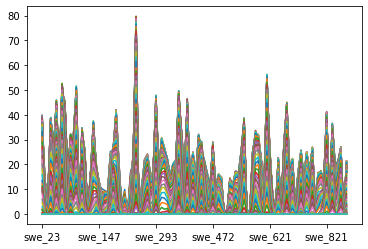

In [37]:
# snow water over time, 100 stations
swe.head(100).T.plot(kind='line', legend=False)

<AxesSubplot:>

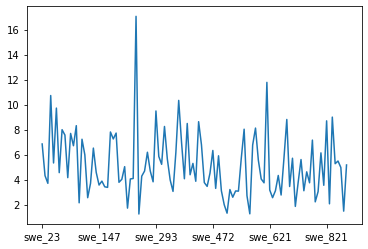

In [36]:
# average
swe.loc['mean'] = swe.mean()
swe.loc['mean'].plot.line()

In [175]:
def filter_days(station_series, days_back=3, plot=False):
    moving_average = np.zeros(len(station_series))
    t = np.arange(len(station_series))
    for i in t:
        moving_average[i] = np.mean(station_series.values[np.max([0, i-days_back]):(i+1)])
    
    noise = station_series.values - moving_average
        
    outlier_dates = (np.argwhere(noise > (3*np.std(noise))).T)[0]

    if plot:
        #print(outlier_dates)
        plt.plot(t, station_series)
        plt.plot(t, moving_average)
        plt.figure()
        plt.title('Noise')
        plt.plot(t, noise)
        
    return outlier_dates

def filter_all_station_days(dff):
    outliers = Counter()
    for idx, station in dff.iterrows():
        o = filter_days(station)
        for day in o:
            outliers[day] += 1

    return outliers

def kitchen_sink(data_type):
    print(translate[data_type])
    
    data = df.filter(regex='^'+data_type, axis=1).copy()
    # First 100 stations
    
    data.loc['mean'] = data.mean()
    
    plt.figure()
    plt.title(translate[data_type])
    filter_days(data.loc['mean'], plot=True)
    outliers = filter_all_station_days(data)
    print('Most likely outlier dates, (day, num_occurances)')
    print(outliers.most_common(10))
    outliers = [o[0] for o in outliers.most_common(10)]
    print('outliers: ', outliers)
    data.head(100).T.plot(title='100 stations over time', kind='line', legend=False, markevery=outliers)
    plt.scatter(outliers, [-2]*len(outliers), color='black')

Snow Water Equivalent (in)
Most likely outlier dates, (day, num_occurances)
[(33, 1828), (3, 310), (71, 76), (79, 74), (5, 70), (25, 60), (10, 55), (51, 54), (55, 33), (4, 31)]
outliers:  [33, 3, 71, 79, 5, 25, 10, 51, 55, 4]


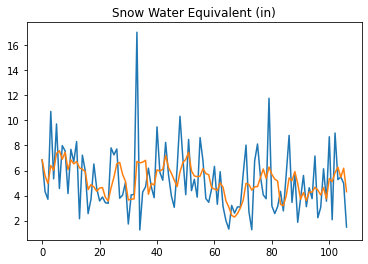

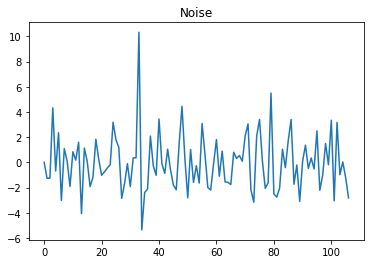

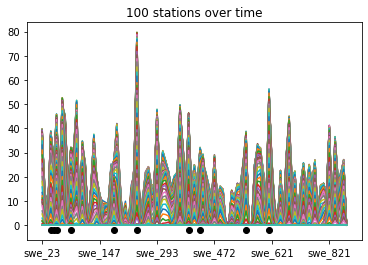

In [176]:
kitchen_sink('swe')

Snow Depth (in)
Most likely outlier dates, (day, num_occurances)
[(33, 1725), (3, 178), (5, 84), (10, 78), (25, 71), (71, 64), (51, 61), (48, 37), (4, 31), (56, 28)]
outliers:  [33, 3, 5, 10, 25, 71, 51, 48, 4, 56]


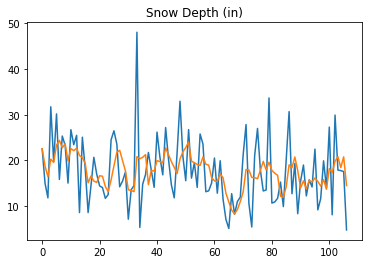

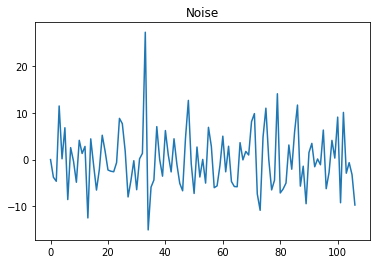

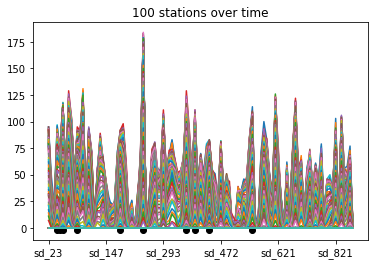

In [177]:
kitchen_sink('sd')

Observed Air Temperature (degrees farenheit)
Most likely outlier dates, (day, num_occurances)
[(16, 196), (8, 147), (2, 108), (61, 87), (40, 79), (24, 72), (106, 64), (30, 46), (18, 43), (49, 41)]
outliers:  [16, 8, 2, 61, 40, 24, 106, 30, 18, 49]


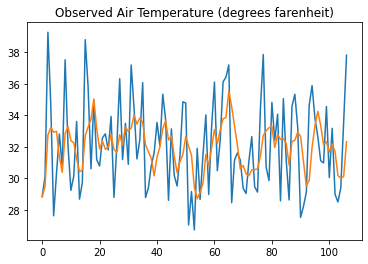

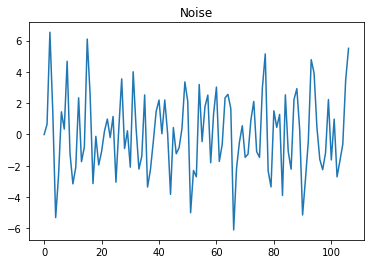

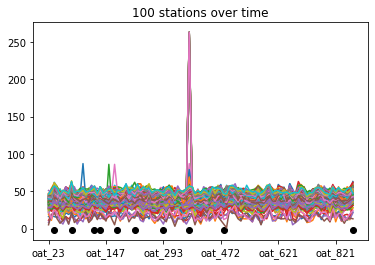

In [178]:
kitchen_sink('oat')

In [224]:
def iForest(data, outliers_fraction=.01):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(scaled)

    scaled = imp.transform(scaled)

    model = IsolationForest(contamination=outliers_fraction)
    model.fit(scaled)
    data['anomaly'] = pd.Series(model.predict(scaled))
    
    a = df.loc[data['anomaly'] == -1] #anomaly
    print('Found {} anomalous stations'.format(len(a.index)))
    plot_data = data.filter(regex='^sd', axis=1)
    plot_a = a.filter(regex='^sd', axis=1)
    plot_data.mean()
    fig, ax = plt.subplots(figsize=(10,6))
    plt.scatter(np.arange(len(plot_data.columns)), plot_data.mean(), label='mean')
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[0], label=('anomaly'+str(plot_a.index[0])))
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[1], label=('anomaly'+str(plot_a.index[1])))
    plt.scatter(np.arange(len(plot_a.columns)), plot_a.iloc[2], label=('anomaly'+str(plot_a.index[2])))

    plt.legend()
    
    plt.show();

Found 37 anomalous stations


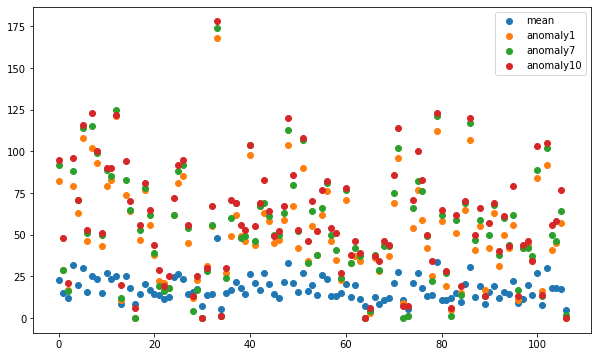

In [225]:
iForest(df)